# Assignment 3: Bootstrap, confidence intervals & standard errors

## Learning Outcomes:
In this homework we will look at Estimates, Bootstrap, Confidence intervals, and Standard error.
## Dataset 
The data set run10sample.csv contains data from random sample of 25 runner of the 16923 competitor in the 2012 Cherry blossom run (cherryblossom.org). The variables in the file are: 

- Place:  Finishing position. Separate positions are provided for each gender.
- time: The total run time (in min) 
- Pace: The listed pace (/mile) for each runner.
- Age: Age.
- Gender: Gender.
- Location: Hometown city. 
- State: Hometown state 
- divPlace: Age Division place, also broken up by gender.
- divTot: Total number of people in the division (again, also split by gender).

The data set run10.csv contains the data from all 16923 competitors, so you can also analyze the whole population. 

## Preliminaries
Set up the environment by importing pandas, numpy, scipy, and matplotlib. 

In [1]:
import pandas as pd
import numpy as np
import scipy as ss
import matplotlib.pyplot as plt 
import seaborn as sns

On some installations, you may still have to configure your notebook such that plots are shown inline (see Assignment 2). 

In [2]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline


## Task 1: Analyzing a sample from the  population (12pt)
In this task you will use the sample of runners that you got. 
### Question 1 (4pt)
What was the mean finishing time in the random sample?

In [3]:
df = pd.read_csv("run10sample.csv")

In [4]:
meanTimeS = df["time"].mean()

print(f"The mean time was {meanTimeS}")

The mean time was 98.1504


### Question 2 (4pt)
What is the number of men and women in your sample (tip: use groupby and size or count)?

In [5]:
nMenS = df['gender'].value_counts()['M']
nWomenS = df['gender'].value_counts()['F']

print(f"The number of men is {nMenS}")

print(f"The number of women is {nWomenS}")

The number of men is 11
The number of women is 14


### Question 3 (4pt)
What was the mean finishing time when you split the sample up by gender (see Homework 2, task 4)? 

In [6]:
menFinishingTimeS = df["time"].groupby(df["gender"]).get_group("M").mean()

womenFinishingTimeS = df["time"].groupby(df["gender"]).get_group("F").mean()

print(f"The mean finishing time for men is {menFinishingTimeS:.4f}")
print(f"The mean finishing time for women is {womenFinishingTimeS:.4f}")

The mean finishing time for men is 91.3464
The mean finishing time for women is 103.4964


## Task 2: Resampling from the population (47 Points)
In this task you will have access to the data from the whole population to determine how much confidence you should have in the numbers you obained in Task 1.The dataset run10.csv contain the total population of 16923 competitors in the 2012 Cherry blossom run (cherryblossom.org). Having the whole population gives us the opportunity to check how good our sample estimate is. 

### Question 1 (10pt)

What is the mean finishing time in the whole population of runners? Written answer: How much does it differ from the mean finishing time of the sample analyzed in Task 1? Can this difference be explained by the fact that our sample differs from the population in terms of gender distribution? How about age? Knowing these differences, how could we have improved our estimate?

In [7]:
df2 = pd.read_csv("run10.csv")

In [8]:
#Mean finishing time in the whole population of runners
meanTime = df2["time"].mean()

print(f"The mean time for the population was {meanTime:.4f}, but {meanTimeS} for the sample")

The mean time for the population was 94.5160, but 98.1504 for the sample


In [9]:
### GENDER / Time split 
nMen = df2['gender'].value_counts()['M']
nWomen = df2['gender'].value_counts()['F']

print(f"The number of men is {nMen}, but {nMenS} for the sample")
print(f"The number of women is {nWomen}, but {nWomenS} for the sample")
print(f'''Which means the population men to women ratio is {nMen/(nWomen+nMen):.3f} men \
to {nWomen/(nWomen+nMen):.3f} women, but {nMenS/(nWomenS+nMenS):.3f} men to 
{nWomenS/(nWomenS+nMenS):.3f} women for the sample\n''')

menFinishingTime = df2["time"].groupby(df2["gender"]).get_group("M").mean()

womenFinishingTime = df2["time"].groupby(df2["gender"]).get_group("F").mean()

print(f"The mean finishing time for men in the population is {menFinishingTime:.3f}, and {menFinishingTimeS:.3f} for the sample")
print(f"The mean finishing time for women in the population is {womenFinishingTime:.3f}, and {womenFinishingTimeS:.3f} for the sample")

The number of men is 7191, but 11 for the sample
The number of women is 9732, but 14 for the sample
Which means the population men to women ratio is 0.425 men to 0.575 women, but 0.440 men to 
0.560 women for the sample

The mean finishing time for men in the population is 88.426, and 91.346 for the sample
The mean finishing time for women in the population is 99.016, and 103.496 for the sample


The mean age in the population is 35.521, but 37.040 in the sample

The mean age for men in the population is 39.909, and 37.745 for the sample
The mean age for women in the population is 34.786, and 33.878 for the sample


<AxesSubplot:xlabel='age', ylabel='time'>

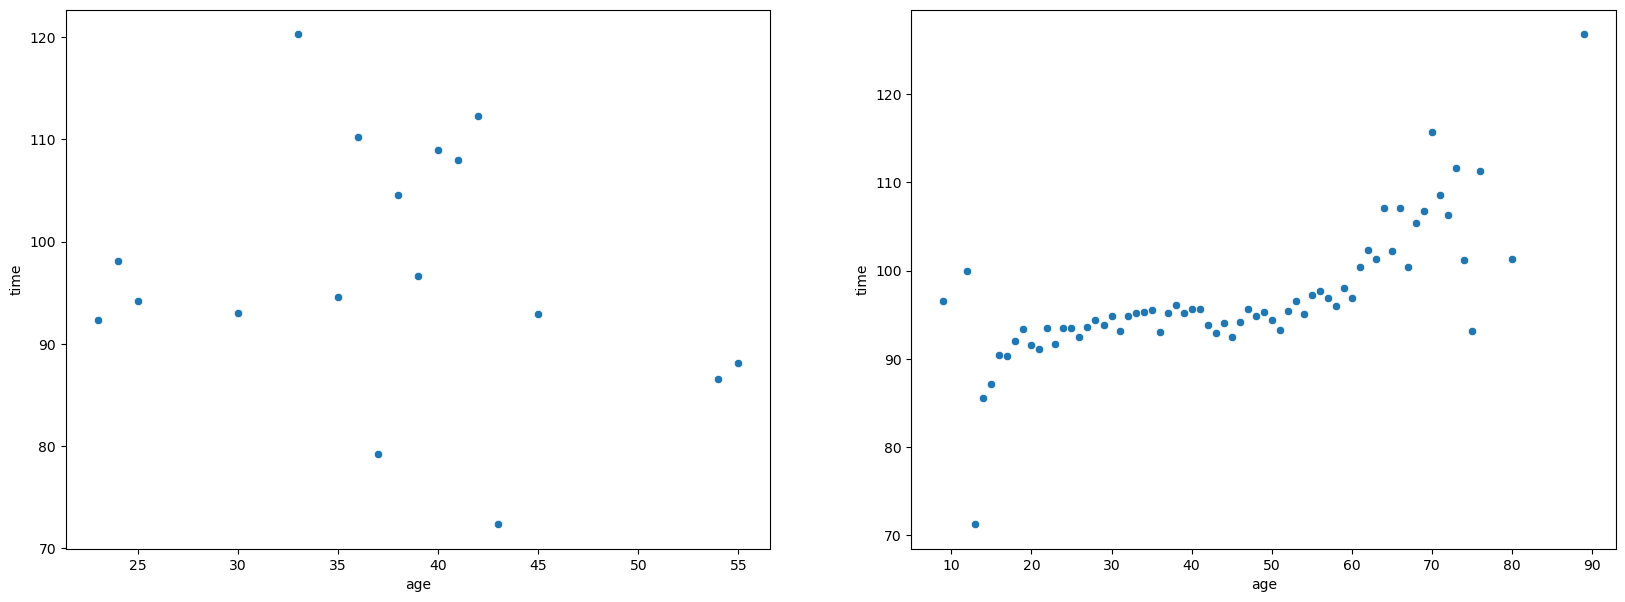

In [10]:
### AGE
meanAge = df2["age"].mean()
meanAgeS = df["age"].mean()

print(f"The mean age in the population is {meanAge:.3f}, but {meanAgeS:.3f} in the sample\n")

menAgeS = df2["age"].groupby(df2["gender"]).get_group("M").mean()
menAge = df["age"].groupby(df["gender"]).get_group("M").mean()

womenAgeS = df2["age"].groupby(df2["gender"]).get_group("F").mean()
womenAge = df["age"].groupby(df["gender"]).get_group("F").mean()

print(f"The mean age for men in the population is {menAge:.3f}, and {menAgeS:.3f} for the sample")
print(f"The mean age for women in the population is {womenAge:.3f}, and {womenAgeS:.3f} for the sample")

# Age to time correlation 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

sns.scatterplot(data = df["time"].groupby(df["age"]).mean(), ax = axes[0])
sns.scatterplot(data = df2["time"].groupby(df2["age"]).mean(), ax = axes[1])

Figure 1. Age vs Time graphs for the sample (left) and population (right). The mean time per age was used. 

Written answer: The mean finishing time for the population was lower than calculated in the sample. This could be because our sample has a greater proportion of women than the population actually has, this is important as the mean finishing time for women is substantially higher than in men (in both the sample and population). The higher finishing time in the sample could also be due to the fact that the mean age in our sample was also higher than the population mean. This is important as the general trends for this data show that the older a person gets the more likely they are to have a higher run time. Knowing these differences, our estimate could be improved by repeating the process and making further comparisons and averages (bootstrap technique). This allows for more ground to be covered so we are not just hoping that our one singular sample is wholy representative. 


### Question 2 (10pt)
Write a function **bootstrap**, which takes a data series (data) as an input and then performs a bootstrap. The function should take numIter samples from the data (with replacement) of size N. It should then calculate the statistics defined in fcn for each iteration and record it in a numpy-array, which it should then return.

Input arguments 
- data: data series to resample
- N: Sample size for each iteration 
- fcn: function to apply to the sample to get the statistics
- numIter: Number of resamples (should default to 1000) 

Output argument: 
- Numpy array of size numIter that contains the estimates of the statistics (i.e. the bootstrap sample)


In [11]:
def bootstrap(data, N, fcn, numIter = 1000):
    sample = np.array([])
    
    for i in range (0, numIter):
        value = np.random.choice(data, replace = True, size = N)
       
        x = fcn(value)
        
        sample = np.append(sample, x)
        
    return sample

### Question 3 (8pt)
Call the resample (bootstrap) function from Question 2 with time from the whole population as the data series, mean as the statistic, and a sample size of 25. Plot a histogram of the samples – make sure your x-axis and y-axis are labeled and a caption added. Report the mean and the standard deviation of the resampled estimates. 

The mean is 94.5198, and the standard deviation is 3.2112


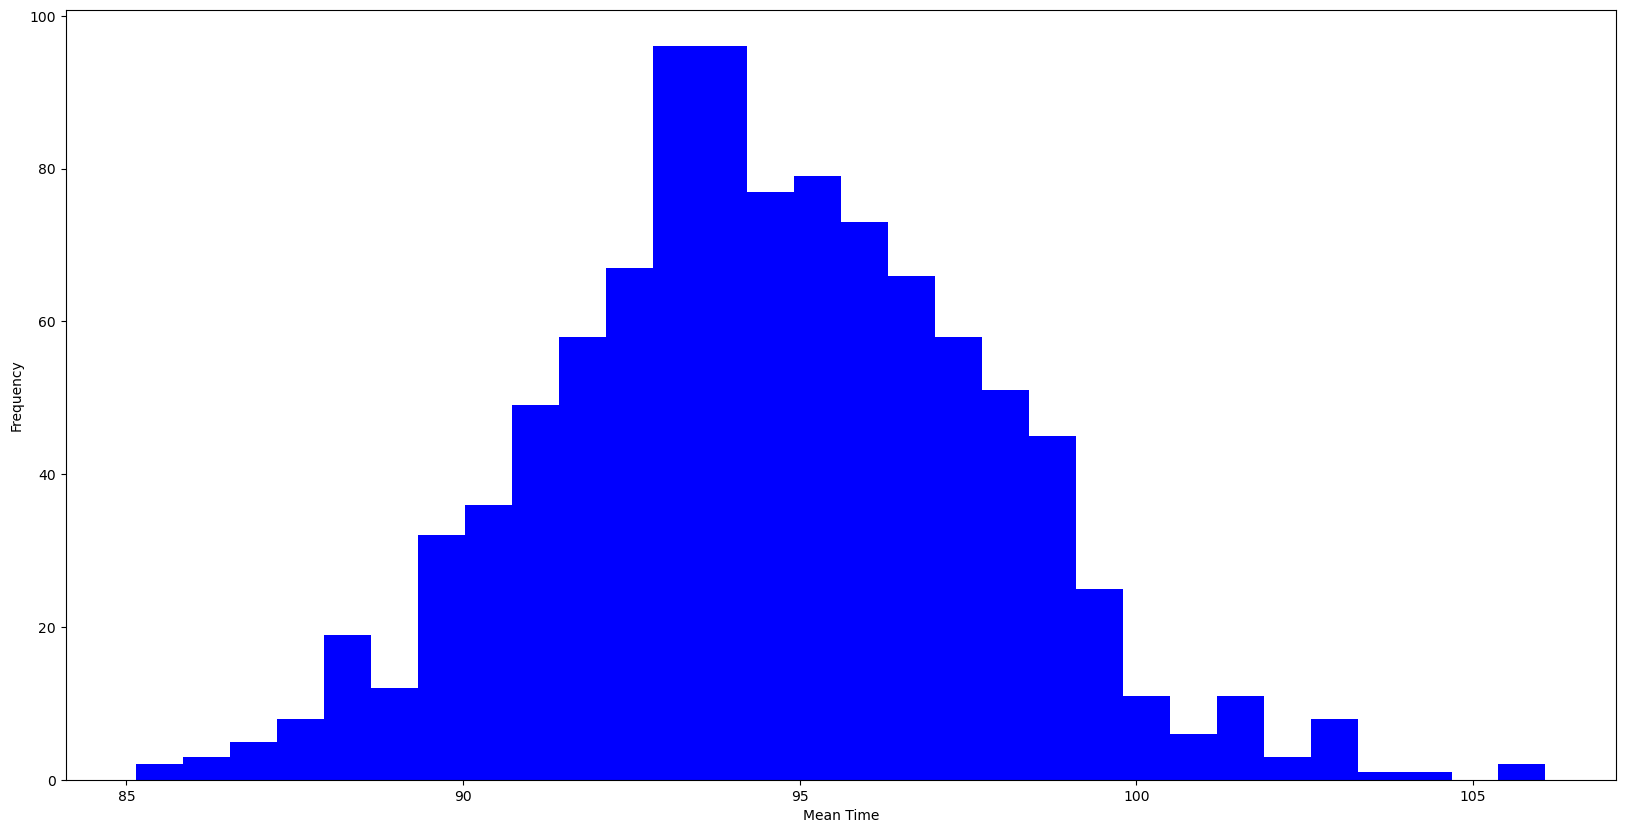

In [12]:
meanSubset = bootstrap(df2["time"], 25, np.mean)
#stdSubset = bootstrap(df2["time"], 25, np.std)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10))
axes.hist(meanSubset, bins = 30, color = 'b')
axes.set_xlabel("Mean Time")
axes.set_ylabel("Frequency")
# axes[1].hist(stdSubset, bins = 25, color = 'g')
# axes[1].set_xlabel("Standard Deviation of Time")
# axes[1].set_ylabel("Frequency")

print(f"The mean is {meanSubset.mean():.4f}, and the standard deviation is {meanSubset.std():.4f}")

# Please ignore commented out code, I believe I misunderstood the question originally but would like to leave
# it for my own future reference

Figure 2. Histogram of mean time, taken from a bootstrap sample of 25 people 1000 times, with replacement. 

### Question 4 (8pt)
Call your bootstrap function again as in question 3, this time increasing the sample size first to 50, and then to 100. Which of the values (mean, standard deviation) of the means distribution changes most and why? 

50: The mean is 94.4557, and the standard deviation is 2.1967
100: The mean is 94.5146, and the standard deviation is 1.5189


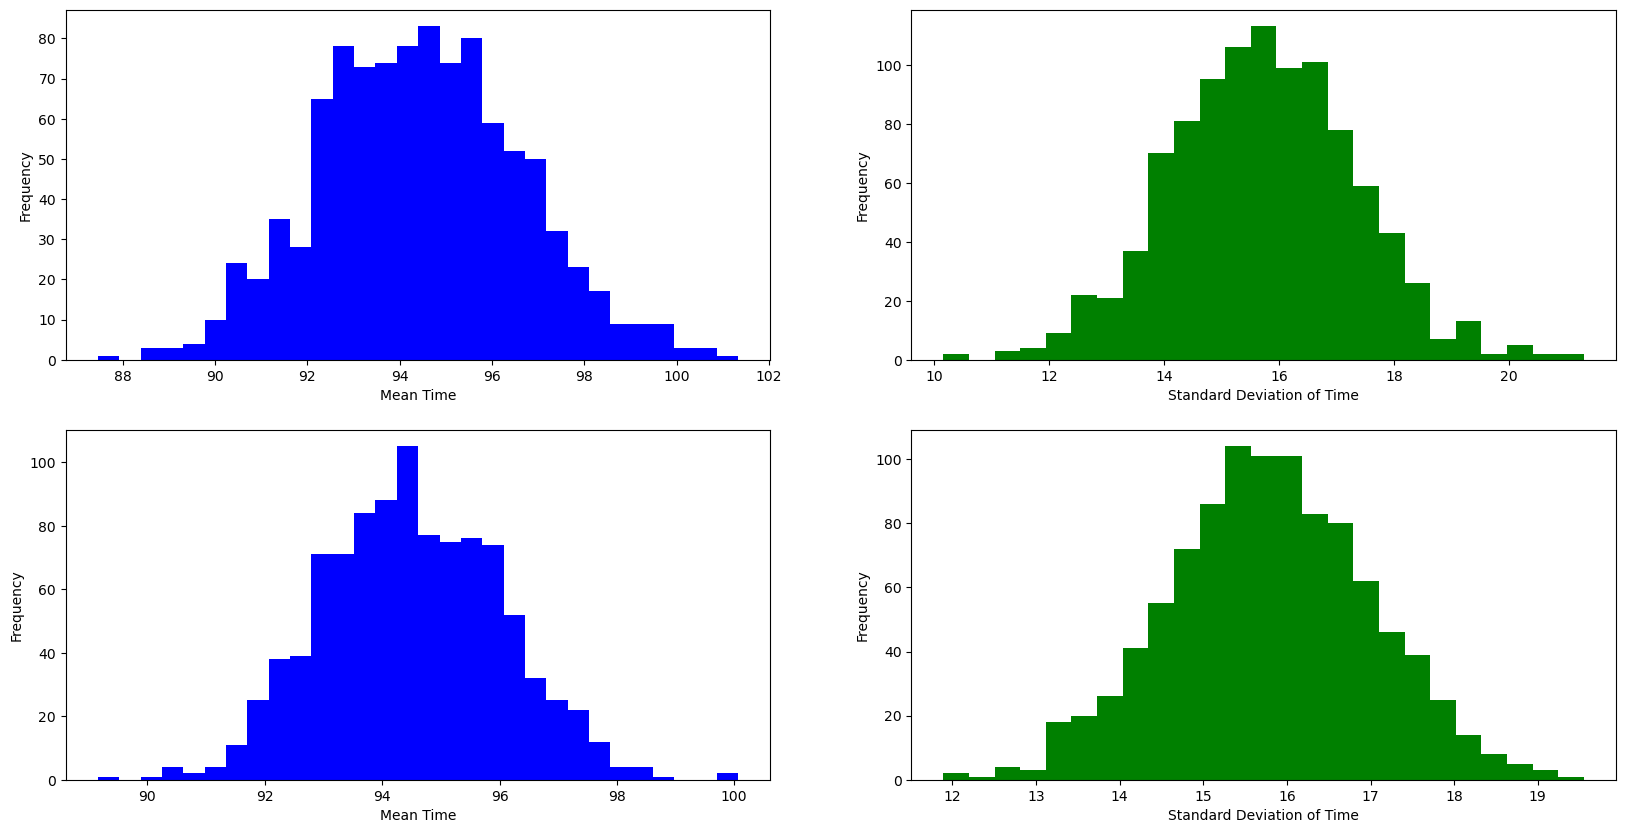

In [13]:
# Once again I did some experimenting so that I understood the topic. Questions are still appropriately answered
# and proper figure captions are provided.

meanSubset1 = bootstrap(df2["time"], 50, np.mean)
stdSubset1 = bootstrap(df2["time"], 50, np.std)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
axes[0,0].hist(meanSubset1, bins = 30, color = 'b')
axes[0,0].set_xlabel("Mean Time")
axes[0,0].set_ylabel("Frequency")
axes[0,1].hist(stdSubset1, bins = 25, color = 'g')
axes[0,1].set_xlabel("Standard Deviation of Time")
axes[0,1].set_ylabel("Frequency")

meanSubset2 = bootstrap(df2["time"], 100, np.mean)
stdSubset2 = bootstrap(df2["time"], 100, np.std)

axes[1,0].hist(meanSubset2, bins = 30, color = 'b')
axes[1,0].set_xlabel("Mean Time")
axes[1,0].set_ylabel("Frequency")
axes[1,1].hist(stdSubset2, bins = 25, color = 'g')
axes[1,1].set_xlabel("Standard Deviation of Time")
axes[1,1].set_ylabel("Frequency")

print(f"50: The mean is {meanSubset1.mean():.4f}, and the standard deviation is {meanSubset1.std():.4f}")
print(f"100: The mean is {meanSubset2.mean():.4f}, and the standard deviation is {meanSubset2.std():.4f}")

Figures 3-6. Histograms of mean time and standard deviation of time. Top figures are a bootstrap sample of size 50, and bottom figures are of size 100. Each graph is representitive of a different bootstrap samples that included 50 or 100 people sampled with replacement 1000 times. 

Written answer: Range of values is more narrow when the sample size is bigger. The standard deviation experiences more changes than the mean. This is because the more times you run and take the mean of the bootstrap sample the closer you get to get to the true population mean. This means you are getting more accurate representations of the data and so the deviation will be less. 

### Question 5 (6pt)
Calculate the predicted standard error of the mean from the population standard deviation and the same size for  N=25, N=50, and N=100. Write a line of code for each sample size that prints the answer in a full sentence. Written answer: Do these match up with the SEMs that you got from question 4? 

In [14]:
print(f"The standard error of means for sample size 25 is: {df2['time'].std() / np.sqrt(25):.4f}")
print(f"The standard error of means for sample size 50 is: {df2['time'].std() / np.sqrt(50):.4f}")
print(f"The standard error of means for sample size 100 is: {df2['time'].std() / np.sqrt(100):.4f}")

The standard error of means for sample size 25 is: 3.1844
The standard error of means for sample size 50 is: 2.2517
The standard error of means for sample size 100 is: 1.5922


Written answer: The standard error of means nearly matches the standard deviation of the means. Therefore the assumption is that the standard error of the population can be estimated from the standared deviation of the mean of distributions.

## Task 3: Calculating confidence intervals (24pt) 
### Question 1 (8pt)
Write a function (confidenceInt) that constructs a confidence interval from a bootstrap sample using the percentile bootstrap method (see lecture). 	

Input arguments 
- data: Sample of estimates – usually this is output from “bootstrap” (resample function from task 3 Q2)
- prec: What Confidence interval in percent? 95= 95% confidence interval <br/>
Output argument: 
- A list with 2 values: the lower and upper bound of the interval. 

Tip: Use np.percentile to get a specific percentile of the data. The lower bound of a 95% confidence interval is the (100-95)/2=2.5 percentile. 

In [15]:
def confidenceInt(data, prec):
    bounds = []
    bounds.append(np.percentile(data, 100-prec))
    bounds.append(np.percentile(data, prec))
    
    return bounds

### Question 2 (8pt)
Determine the confidence 95% interval for the mean estimate of your sample of 25. Use your bootstrap function (resample from Task 3 Q2) above to generate 1000 artificial samples of 25. Then use your confidenceInt function to get the 95% confidence interval.  Report the interval. 


In [16]:
bootSamp = bootstrap(df2["time"], 25, np.mean, 1000)

print(f"The interval is from {confidenceInt(bootSamp, 95)}")

The interval is from [89.22762000000002, 99.43748000000002]


### Question 3  (8pt)
Repeat the plotting of the histogram from task 2.3 – but this time plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline. Make sure that the graph has x- and y-labels and a caption.

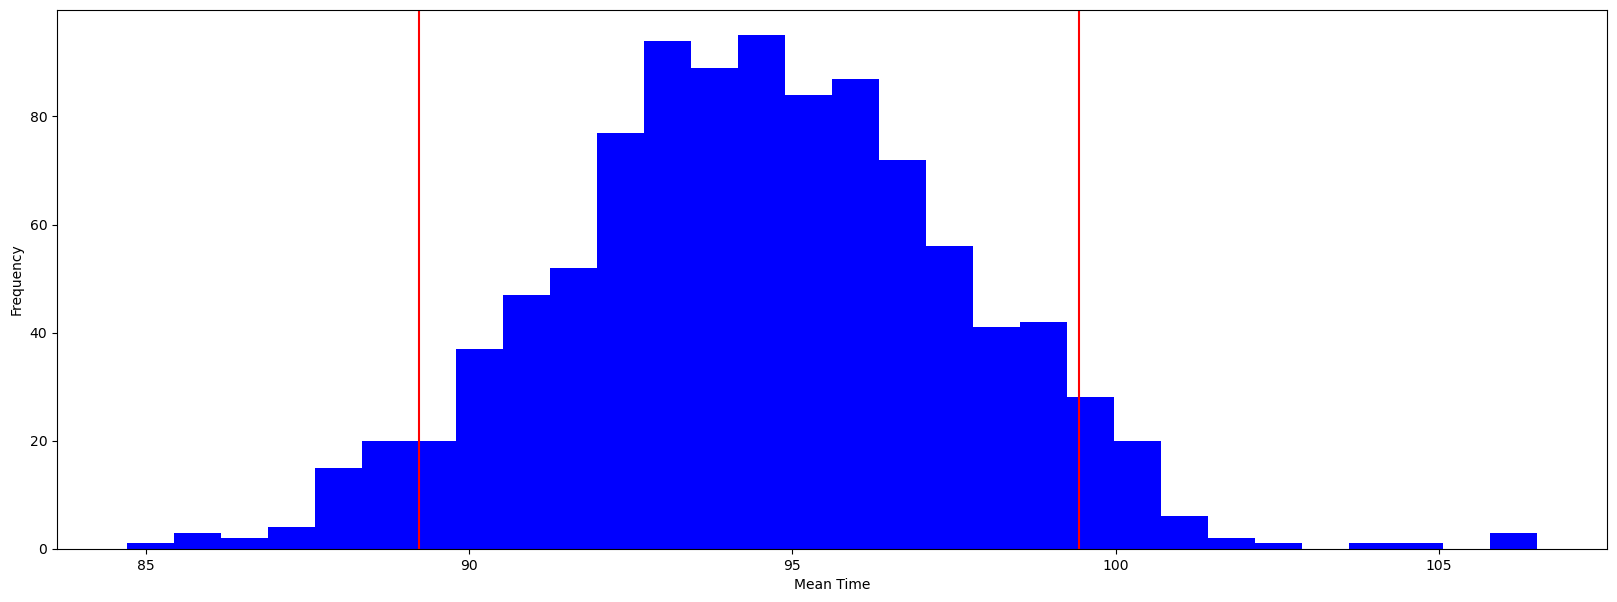

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,7))
axes.hist(bootSamp, bins = 30, color = 'b')
axes.set_xlabel("Mean Time")
axes.set_ylabel("Frequency")
plt.axvline(x = confidenceInt(bootSamp, 95)[0], color = 'r')
plt.axvline(x = confidenceInt(bootSamp, 95)[1], color = 'r')


Figure 7. Histogram of mean time, taken from a bootstrap sample of 25 people 1000 times, with replacement. Lines are at the 95% confidence interval.

## Task 4: Bootstraping from the sample (22pt)
Now let's forget that you ever had the data from the whole population. Say, you only have your initial sample of 25 participants. How would you get an estimate of the confidence interval of the mean of the sample? 
### Question 1 (8pt)
Load the sample stored in run10sample.csv. Now call the resample function with that time data, in each loop resampling 25 data points from 25 data points (with replacement!). You have now taken 1000 bootstrap samples. Report the mean of the bootstrap samples, the standard deviation of the the samples, and the 95% confidence interval.

In [18]:
bootSampSMean = bootstrap(df["time"], 25, np.mean, 1000)
bootSampSSD = bootstrap(df["time"],25, np.std, 1000)

print(f"""The mean is: {bootSampSMean.mean()}\n\
The standard deviation is: {bootSampSSD.std()}\n\
The interval is from {confidenceInt(bootSampSMean, 95)}""")


The mean is: 98.04621519999999
The standard deviation is: 1.9900252362607846
The interval is from [93.78962000000001, 102.42291999999999]


### Question 2 (8pt)
Plot of the histogram of your bootstrap samples –plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline (see homework 3). Plot the true population mean (Task 2.1) as a red vertical line. Make sure that the graph has x- and y-labels and caption saying what the different lines mean. 

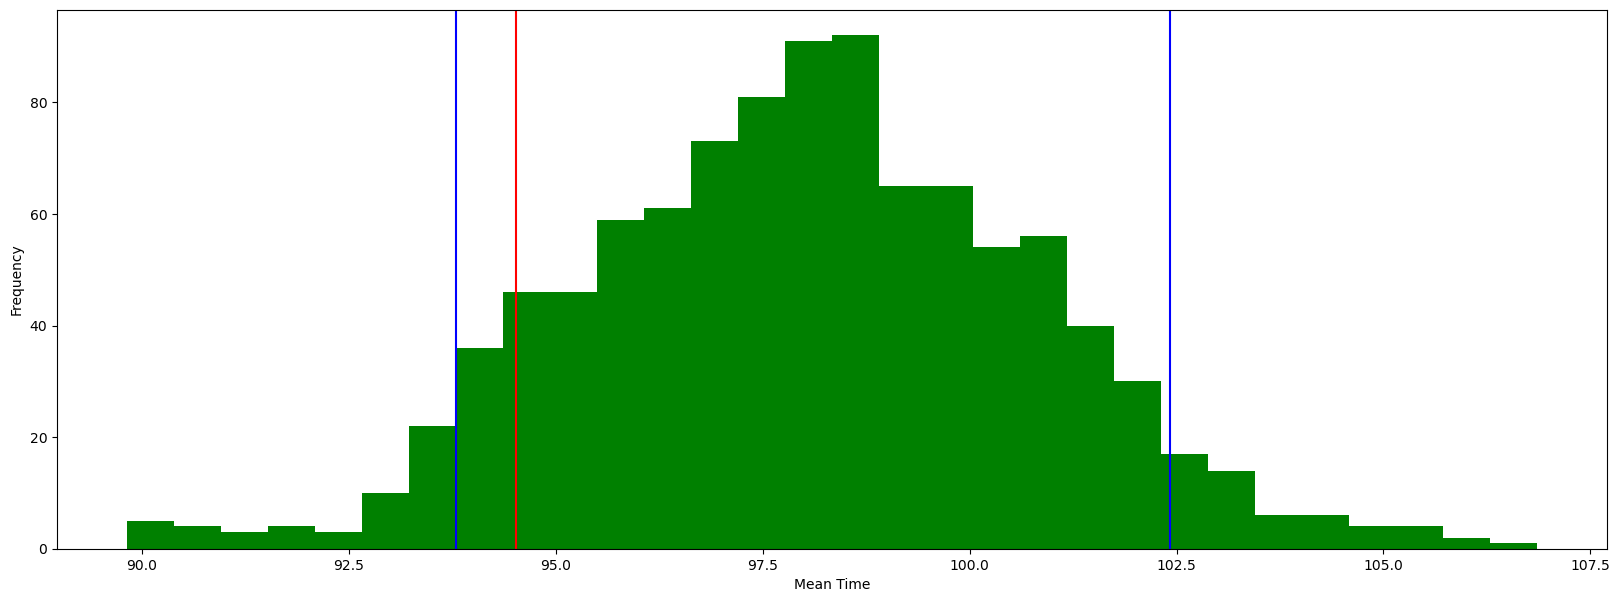

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,7))
axes.hist(bootSampSMean, bins = 30, color = 'g')
axes.set_xlabel("Mean Time")
axes.set_ylabel("Frequency")
plt.axvline(x = confidenceInt(bootSampSMean, 95)[0], color = 'b')
plt.axvline(x = confidenceInt(bootSampSMean, 95)[1], color = 'b')
plt.axvline(x = meanTime, color = 'r')

Figure 8. Histogram of mean time from a subsample of 25, plotted from a bootstrap sample of 25 people 1000 times, with replacement. Blue lines are at the 95% confidence interval and the red line is the true population mean.

### Question 3: (6pt)
Written answer: Does the 95% confidence interval include the true population mean? Does it include the mean value from last year’s cherry blossom run (101min)? Is there statistical evidence from your sample of N=25, that the race times have gotten faster from last year? 

The 95% confidence interval does include this years population mean as well as the mean from last years run. I would say there is not statistical evidence that the race times have gotten faster as this years race time was predicted to be anywhere within the 95% confidence interval. Last years race time is within this interval and therefore if was very probable for this years to fall closer to last years race time average. 